# Pearson Correlation

Dependencies

In [1]:
import pandas as pd
from scipy.stats import pearsonr

Load the dataset

In [2]:
file_path = 'C:\\Users\\Shadow\\Desktop\\GIT_PE\\survey_data\\survey_data.csv'
dataset = pd.read_csv(file_path)

Selecting relevant columns

In [3]:

appliance_columns = [
    'Rooms', 'Members', 'Fans', 'Lights', 'Freezes', 'Microwave Oven', 
    'Geyser', 'AC', 'Washing Machine', 'TV', 'PC', 'Induction Stove'
]

unit_columns = [col for col in dataset.columns if 'unit' in col]


Creating a subset of the dataset with the selected columns

In [4]:
selected_data = dataset[appliance_columns + unit_columns]

Dropping rows with missing values in the selected columns

In [5]:
selected_data = selected_data.dropna()

Calculating the Pearson correlation matrix

In [6]:
correlation_matrix = selected_data.corr()

In [7]:
print(correlation_matrix)

                        Rooms   Members      Fans    Lights   Freezes  \
Rooms                1.000000  0.356144  0.671576  0.528849  0.297935   
Members              0.356144  1.000000  0.266125  0.210994  0.254423   
Fans                 0.671576  0.266125  1.000000  0.588798  0.288512   
Lights               0.528849  0.210994  0.588798  1.000000  0.225401   
Freezes              0.297935  0.254423  0.288512  0.225401  1.000000   
Microwave Oven       0.528122  0.339392  0.286623  0.249492  0.444357   
Geyser               0.420435  0.230996  0.348578  0.279560  0.402889   
AC                   0.453154  0.277040  0.396227  0.300073  0.613180   
Washing Machine      0.461134  0.328148  0.231167  0.215540  0.461773   
TV                   0.332944  0.222063  0.387382  0.282631  0.533003   
PC                   0.422535  0.356927  0.201320  0.230309  0.319810   
Induction Stove      0.163001  0.147753  0.116547  0.084445  0.228343   
post_21_july_unit    0.379343  0.287070  0.335737  

Save the correlation matrix to a CSV file

In [8]:
correlation_matrix.to_csv('correlation_matrix.csv')

Visualize correlations using a heatmap

In [9]:
# Dependencies

import seaborn as sns
import matplotlib.pyplot as plt
import os 

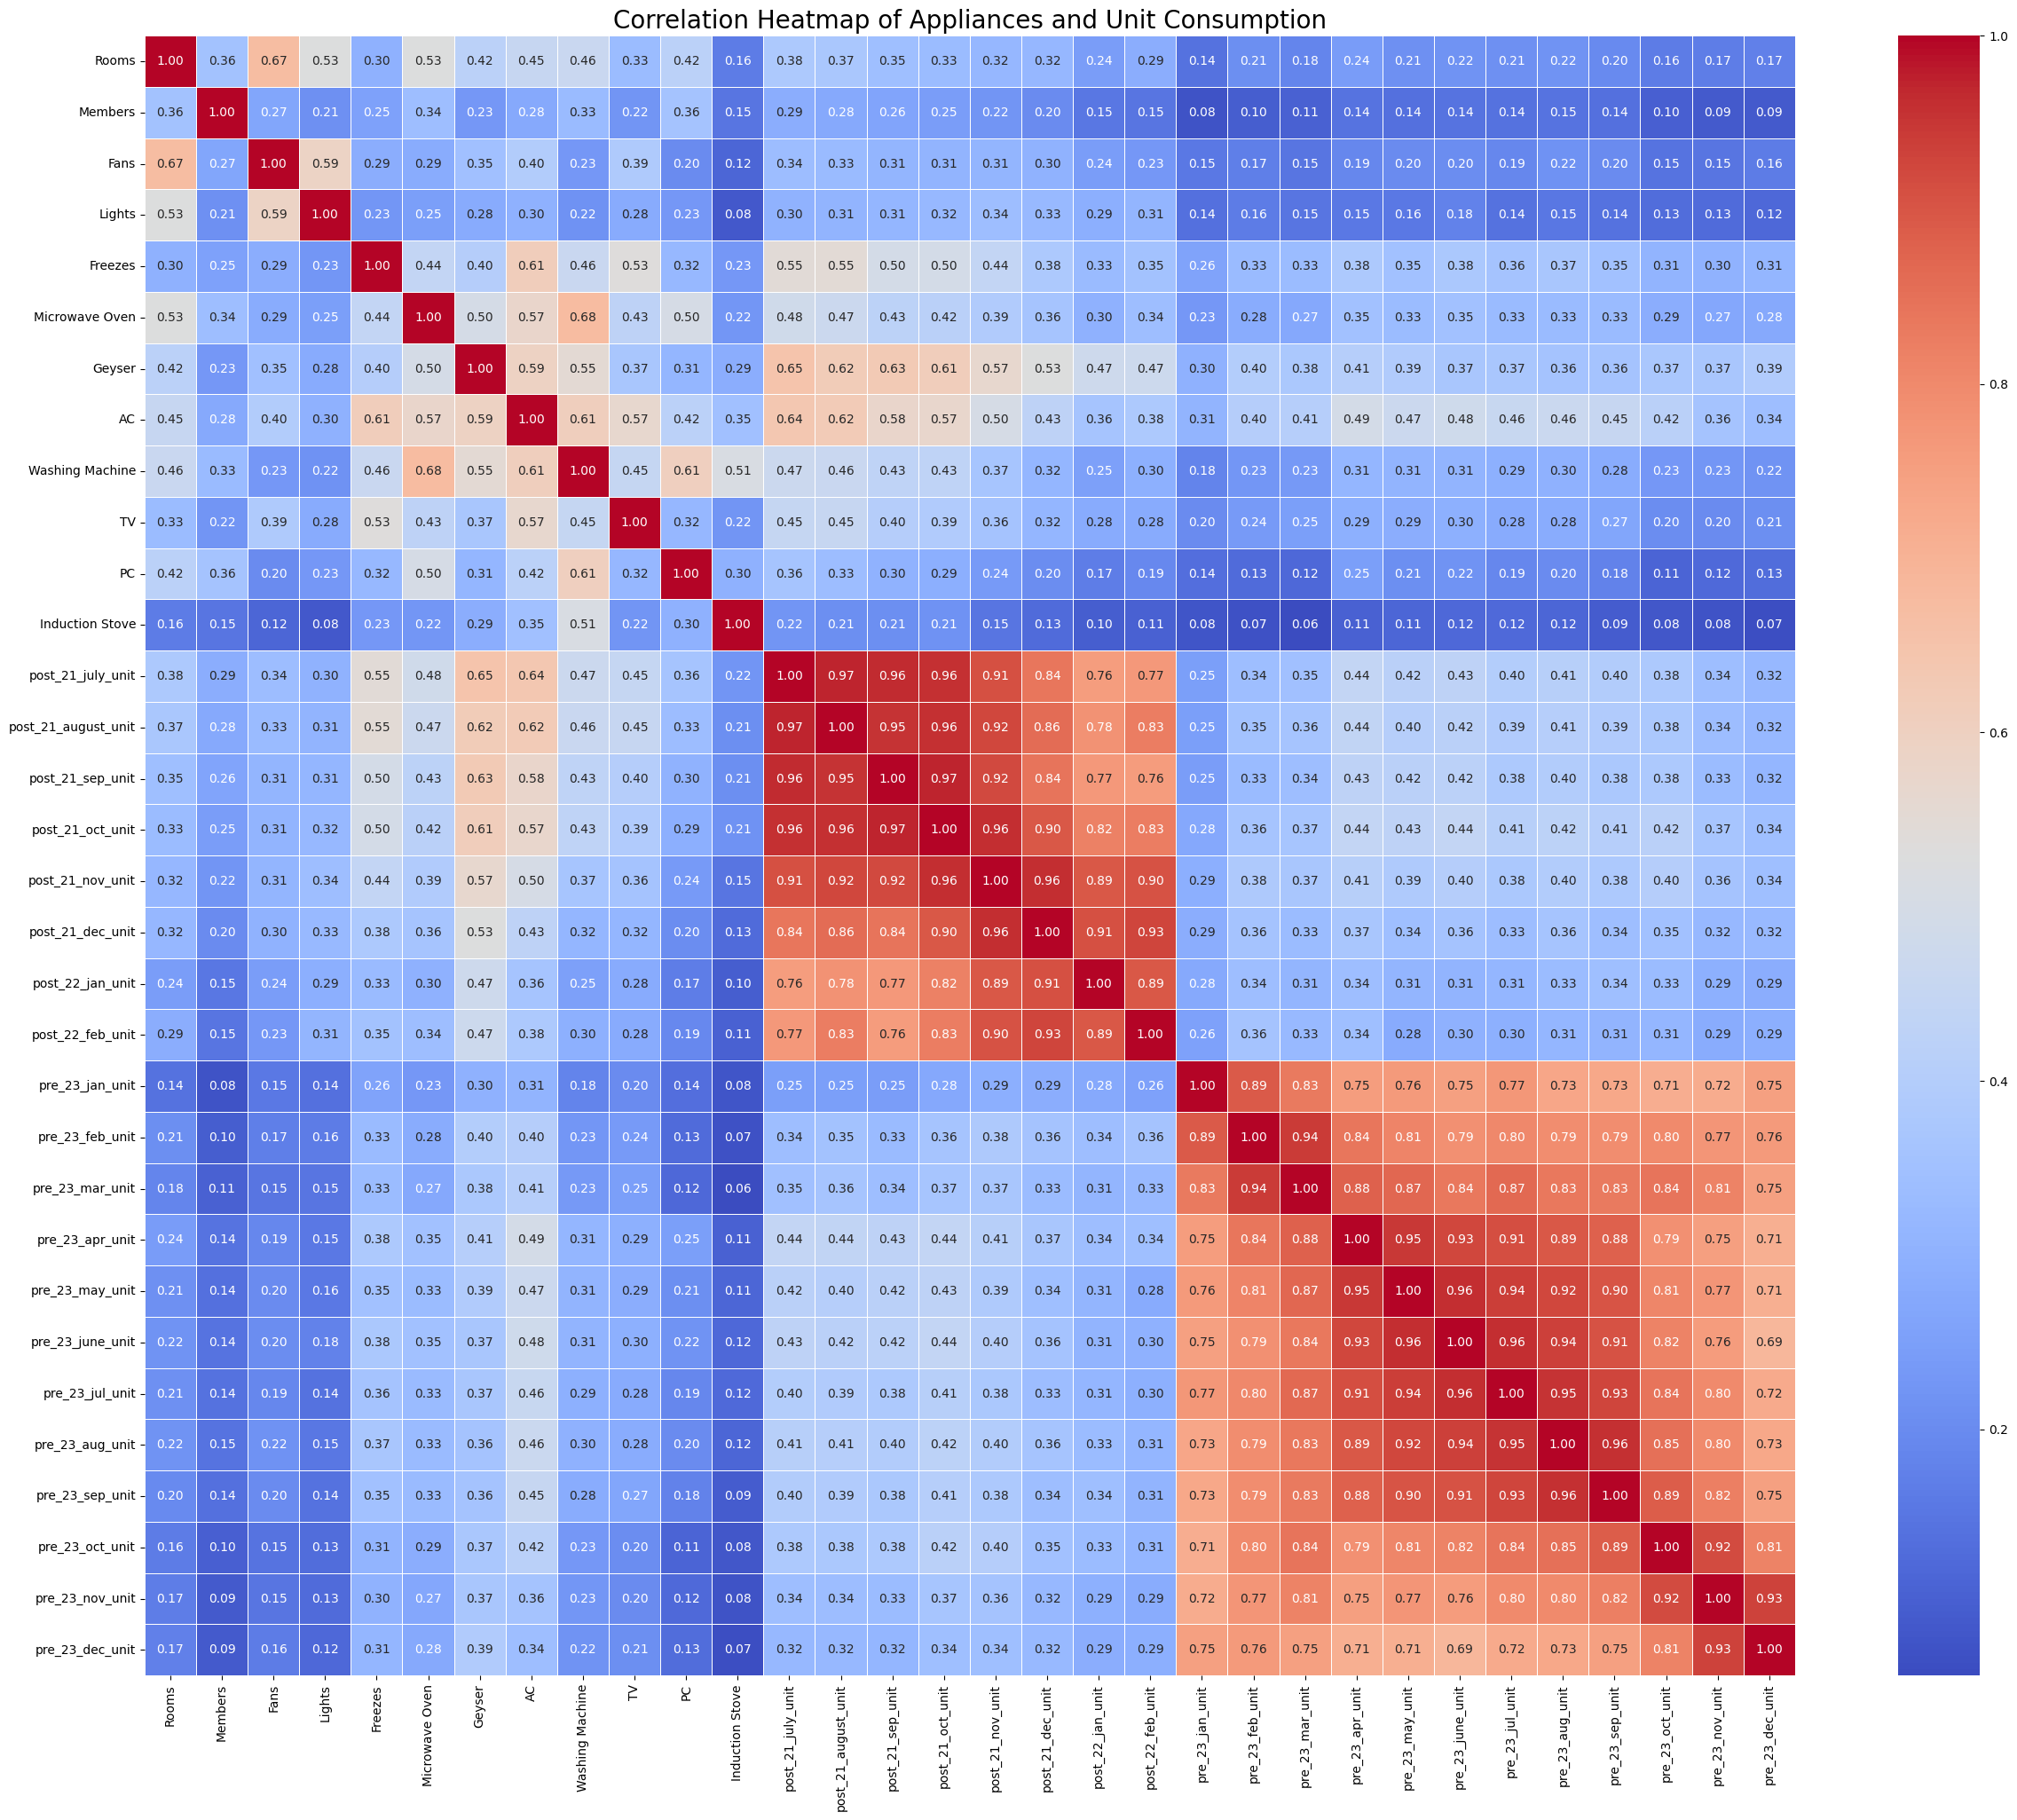

In [10]:

# Setting up the figure size for better visibility
plt.figure(figsize=(30, 24))

# Creating a heatmap for the correlation matrix with larger annotations
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, annot_kws={"size": 10})
# heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="RdGy", linewidths=0.5, annot_kws={"size": 10})

# Adding a title for clarity
plt.title('Correlation Heatmap of Appliances and Unit Consumption', fontsize=20)

# Get the directory of the current script
try:
    current_directory = os.path.dirname(os.path.abspath(__file__))
except NameError:
    current_directory = os.getcwd()

# Save the heatmap to a file in the same directory as the script
output_file_path = os.path.join(current_directory, 'correlation_heatmap.png')
plt.savefig(output_file_path, bbox_inches='tight')

# Displaying the heatmap
plt.show()
